# Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn
print(sklearn.__version__)

1.7.2


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

In [4]:
df_all = pd.read_csv("data_allrounds_activitybinary.csv", sep=";")
df_all.head()

,round,sample,ID_plate,centroid_1,centroid_2,growth_rate,peaks,circularity,eccentricity,RGB_mean_1,...,Labt_mean_1,Labt_mean_2,Labt_mean_3,Labt_std_1,Labt_std_2,Labt_std_3,activity_total,activity_gram_p,activity_gram_n,activity_fungi
0,1,10µl-nr1,1-1,835,1242,"0,1338005",23,"0,96578","0,18561","246,7854",...,"91,3267","6,5164","7,15765","10,7217","4,70734","7,27739",1,1,1,0
1,1,10µl-nr1,1-2,1484,1109,"0,063329023",13,"1,0207","0,22453","203,4753",...,"69,7232","14,1296","19,6061","4,13404","3,4022","3,81545",0,0,0,0
2,1,10µl-nr2,2-2,493,580,"0,04584244",15,"1,0581","0,28171","207,9126",...,"71,3072","19,8785","15,035","7,10437","5,2638","3,69122",0,0,0,0
3,1,10µl-nr2,2-4,1052,1305,"0,656070866",9,"1,0217","0,44729","186,424",...,"65,0318","13,5466","13,9261","2,10122","2,40051","3,14126",0,0,0,0
4,1,10µl-nr2,2-5,1146,808,"0,053184523",22,"0,98664","0,25451","234,9079",...,"76,051","25,1306","20,0857","6,40666","4,69942","3,93355",0,0,0,0


### Data preparation

In [5]:
#Clean column names
df_all.columns = df_all.columns.str.lower().str.replace(' ', '_')
df_all.columns

Index(['round', 'sample', 'id_plate', 'centroid_1', 'centroid_2',
       'growth_rate', 'peaks', 'circularity', 'eccentricity', 'rgb_mean_1',
       'rgbt_mean_2', 'rgbt_mean_3', 'rgbt_std_1', 'rgbt_std_2', 'rgbt_std_3',
       'lab_mean_1', 'lab_mean_2', 'lab_mean_3', 'lab_std_1', 'lab_std_2',
       'lab_std_3', 'labt_mean_1', 'labt_mean_2', 'labt_mean_3', 'labt_std_1',
       'labt_std_2', 'labt_std_3', 'activity_total', 'activity_gram_p',
       'activity_gram_n', 'activity_fungi'],
      dtype='object')

In [6]:
df_all.dtypes

round               int64
sample             object
id_plate           object
centroid_1          int64
centroid_2          int64
growth_rate        object
peaks               int64
circularity        object
eccentricity       object
rgb_mean_1         object
rgbt_mean_2        object
rgbt_mean_3        object
rgbt_std_1         object
rgbt_std_2         object
rgbt_std_3         object
lab_mean_1         object
lab_mean_2         object
lab_mean_3         object
lab_std_1          object
lab_std_2          object
lab_std_3          object
labt_mean_1        object
labt_mean_2        object
labt_mean_3        object
labt_std_1         object
labt_std_2         object
labt_std_3         object
activity_total      int64
activity_gram_p     int64
activity_gram_n     int64
activity_fungi      int64
dtype: object

In [7]:
np.mean(df_all.isnull().sum())


np.float64(0.0)

### Exploratory data analysis

In [8]:
for col in df_all.columns:
    print(col)
    print(df_all[col].unique()[:5])
    print(df_all[col].nunique()) #number of unique values
    print('---')

round
[1 2]
2
---
sample
['10µl-nr1' '10µl-nr2' '10µl-nr3' '10µl-nr4' '10µl-nr5']
51
---
id_plate
['1-1' '1-2' '2-2' '2-4' '2-5']
383
---
centroid_1
[ 835 1484  493 1052 1146]
390
---
centroid_2
[1242 1109  580 1305  808]
398
---
growth_rate
['0,1338005' '0,063329023' '0,04584244' '0,656070866' '0,053184523']
362
---
peaks
[23 13 15  9 22]
25
---
circularity
['0,96578' '1,0207' '1,0581' '1,0217' '0,98664']
432
---
eccentricity
['0,18561' '0,22453' '0,28171' '0,44729' '0,25451']
451
---
rgb_mean_1
['246,7854' '203,4753' '207,9126' '186,424' '234,9079']
453
---
rgbt_mean_2
['225,925' '160,3111' '160,9032' '148,5897' '169,5041']
451
---
rgbt_mean_3
['217,3063' '135,6222' '148,3548' '133,641' '151,9421']
453
---
rgbt_std_1
['22,9483' '16,0928' '28,7998' '7,89643' '21,5408']
453
---
rgbt_std_2
['31,6416' '10,0833' '15,8332' '5,8387' '17,2004']
453
---
rgbt_std_3
['36,2281' '7,72625' '13,2729' '5,50831' '16,3168']
453
---
lab_mean_1
['89,0539' '69,1886' '69,2019' '64,0392' '75,2906']
453
---

<Axes: xlabel='activity_total', ylabel='Count'>

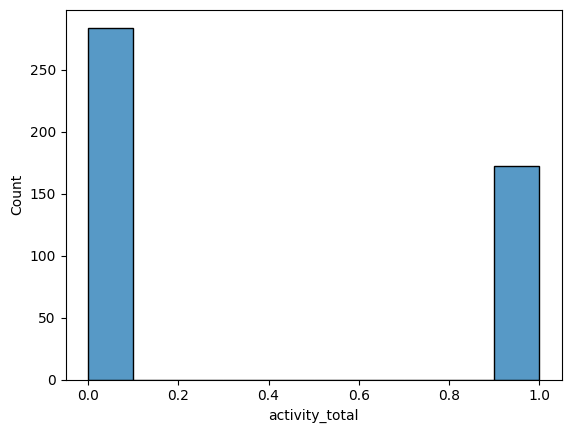

In [9]:
sns.histplot(df_all['activity_total'])

### Split data

In [10]:
df = df_all.iloc[:,3:28].copy()
df.head()

,centroid_1,centroid_2,growth_rate,peaks,circularity,eccentricity,rgb_mean_1,rgbt_mean_2,rgbt_mean_3,rgbt_std_1,...,lab_std_1,lab_std_2,lab_std_3,labt_mean_1,labt_mean_2,labt_mean_3,labt_std_1,labt_std_2,labt_std_3,activity_total
0,835,1242,"0,1338005",23,"0,96578","0,18561","246,7854","225,925","217,3063","22,9483",...,"11,1602","6,90168","8,14749","91,3267","6,5164","7,15765","10,7217","4,70734","7,27739",1
1,1484,1109,"0,063329023",13,"1,0207","0,22453","203,4753","160,3111","135,6222","16,0928",...,"5,09732","3,40151","4,86611","69,7232","14,1296","19,6061","4,13404","3,4022","3,81545",0
2,493,580,"0,04584244",15,"1,0581","0,28171","207,9126","160,9032","148,3548","28,7998",...,"7,38965","5,17052","3,67209","71,3072","19,8785","15,035","7,10437","5,2638","3,69122",0
3,1052,1305,"0,656070866",9,"1,0217","0,44729","186,424","148,5897","133,641","7,89643",...,"3,66983","2,71661","3,49231","65,0318","13,5466","13,9261","2,10122","2,40051","3,14126",0
4,1146,808,"0,053184523",22,"0,98664","0,25451","234,9079","169,5041","151,9421","21,5408",...,"10,3683","7,04636","6,18122","76,051","25,1306","20,0857","6,40666","4,69942","3,93355",0


In [11]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [12]:
print(df_train.shape, df_val.shape, df_test.shape)

(273, 25) (91, 25) (92, 25)


In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# turn target value into binary
y_train = df_train.activity_total.astype('int').values
y_val = df_val.activity_total.astype('int').values
y_test = df_test.activity_total.astype('int').values

del df_train['activity_total']
del df_val['activity_total']
del df_test['activity_total']

### Decision tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [15]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [16]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [17]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [18]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.42867867867867865

In [19]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.594
   2 -> 0.581
   3 -> 0.558
   4 -> 0.423
   5 -> 0.375
   6 -> 0.393
  10 -> 0.455
  15 -> 0.441
  20 -> 0.478
None -> 0.456


In [20]:
scores = []

for depth in [1, 2, 3]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>

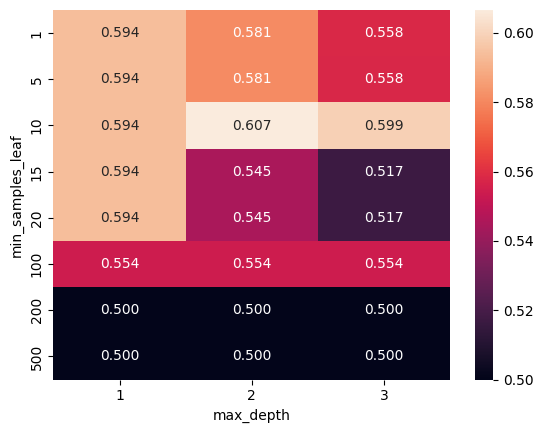

In [21]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
sns.heatmap(df_scores_pivot['auc'], annot=True, fmt=".3f")

In [23]:
dt = DecisionTreeClassifier(max_depth=2, min_samples_leaf=10)
dt.fit(X_train, y_train)
#print(export_text(dt, feature_names=list(dt.get_feature_names_out())))

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
scores = []

for d in [2, 3, 5, 7]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [33]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

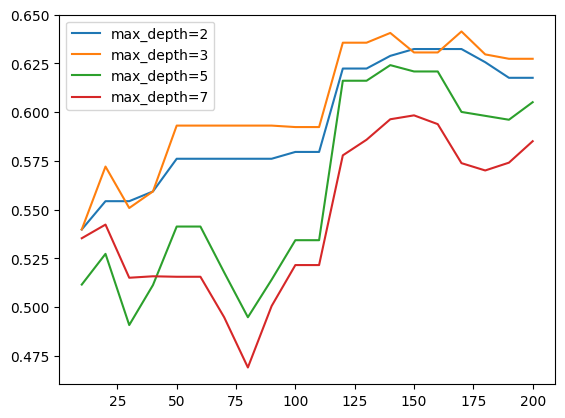

In [34]:
for d in [2, 3, 5, 7]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

Max_dept of 3 seem to be the optimal.

In [35]:
max_depth = 3

In [36]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [37]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

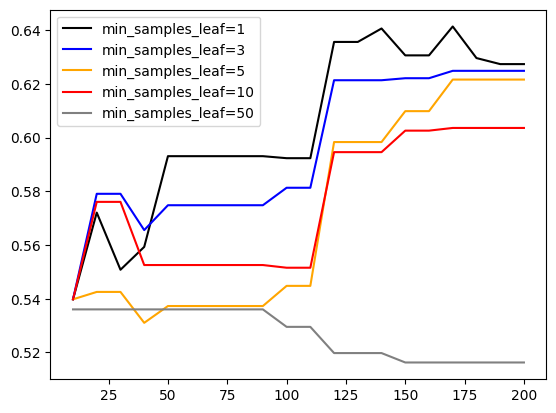

In [38]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

### XGBoost

In [42]:
import xgboost as xgb

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/danielaagarcia-soriano/Documents/GitHub/machine-learning-zoomcamp/.venv/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: '@rpath/libomp.dylib'\n  Referenced from: '/Users/danielaagarcia-soriano/Documents/GitHub/machine-learning-zoomcamp/.venv/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib'\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)"]


In [43]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

NameError: name 'xgb' is not defined